In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Os dados já estão divididos entre train e test.
data = pd.read_csv("DailyDelhiClimateTrain.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


* Vamos dar uma olhada nas estatísticas descritivas dos dados:

In [4]:
print(data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [5]:
#Mostra as informações sobre todas as colunas no conjunto de dados.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


* A coluna de data neste conjunto de dados não tem um tipo de dados datetime. Vamos alterá-lo quando necessário. Vamos dar uma olhada na temperatura média em Nova Deli ao longo dos anos:

In [6]:
figure = px.line(data, x="date", 
                 y="meantemp", 
                 title='Temperatura média em Nova Delhi ao longo dos anos')
figure.show()

* O gráfico mostra que a temperatura segue um padrão sem variações.

In [7]:
#Agora vamos dar uma olhada na umidade em Delhi ao longo dos anos:
figure = px.line(data, x="date", 
                 y="humidity", 
                 title='Humidade em Nova Deli ao longo dos anos')
figure.show()

In [8]:
#Mostra a velocidade do vento em Deli ao longo dos anos:
figure = px.line(data, x="date", 
                 y="wind_speed", 
                 title='Wind Speed in Delhi Over the Years')
figure.show()

* Até 2015, a velocidade do vento era maior durante as monções (agosto e setembro) e nas monções de recuo (dezembro e janeiro). Após 2015, não houve anomalias na velocidade do vento durante as monções. Agora vamos dar uma olhada na relação entre temperatura e umidade:

* Monção: É a designação dada aos ventos sazonais, em geral associados à alternância entre a estação das chuvas e a estação seca, que ocorrem em grandes áreas das regiões costeiras tropicais e subtropicais. A palavra tem a sua origem na monção do oceano Índico e sudeste da Ásia, onde o fenómeno é particularmente intenso.

In [9]:
#Relação entre temperatura e umidade
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols", 
                    title = "Relação entre temperatura e umidade")
figure.show()

* Há uma correlação negativa entre temperatura e umidade em Delhi. Isso significa que temperaturas mais altas resultam em baixa umidade e temperaturas mais baixas resultam em alta umidade.

# **Analisando a Mudança de Temperatura**

Agora vamos analisar a mudança de temperatura em Nova Delhi ao longo dos anos. Para esta tarefa, primeiro converterei o tipo de dados da coluna de data em data e hora. Em seguida, adicionarei duas novas colunas no conjunto de dados para valores de ano e mês.

In [10]:
#Formatando os dados.
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


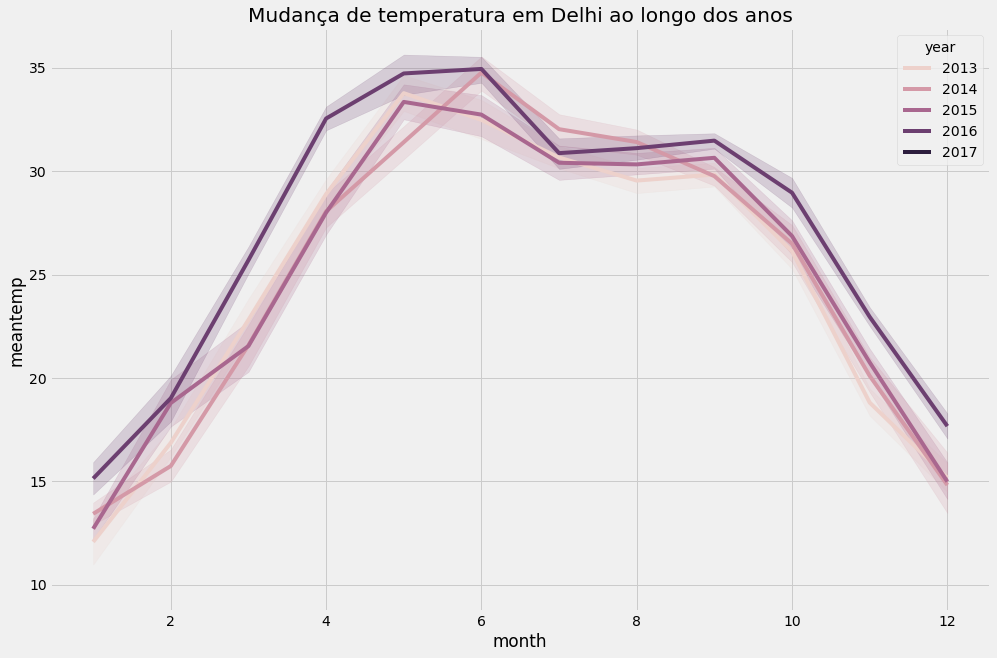

In [11]:
#Variação de temperatura.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Mudança de temperatura em Delhi ao longo dos anos")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

* Embora 2017 não tenha sido o ano mais quente no verão, podemos notar um aumento na temperatura média de Delhi a cada ano.

In [12]:
#O modelo do profeta aceita dados de tempo nomeados como “ds” e rotulados como “y”. Então, vamos converter os dados para este formato:
forecast_data = data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [13]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

21:49:43 - cmdstanpy - INFO - Chain [1] start processing
21:49:50 - cmdstanpy - INFO - Chain [1] done processing


# **Conclusões** 

* O Prophet é uma ferramenta simples que nos possibilita fazer previsões em séries temporais — desde que dentro das limitações do framework — sem que haja a necessidade de possuir conhecimentos profundos. Ainda que simples ela é muito poderosa, pois, com sua abordagem analyst-in-the-loop, é possível atingir excelentes resultados realizando “tunning” dos parâmetros e/ou dados. Para o dataset estudado, esse framework se mostrou eficiente mesmo em suas
configurações padrão, mostrando ser acessível para todos os analistas.

* A previsão do tempo é uma aplicação de séries temporais em que usamos dados e algoritmos de séries temporais para determinado 
  momento. A previsão do tempo é de sua importancia pois ajudam a governos á tomarem medidas contra possíveis desastres naturais.
* Está é uma das formas de usar a biblioteca *prophet*.